#Assignment 04: Deep Learning Algorithms 

This Week's assignment is to train Deep Learning and Machine Learning algorithms on the `fashion_mnist` images dataset to accurately predict the type of clothes in the image.

Before starting copy this file and work on your own copy by following the below steps: 
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 04: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/10/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the machine learning project.
2. Download the dataset using `tf.keras.datasets`.
3. Make sure the pixels values are scaled between (`0-1`).
4. Make sure to convert the target into one hot vector.
5. Train six different Machine Learning models (`KNN`, `Logistics Regression`, `Support Vector Machine`, `Decision Tree`, `Random Forest`, `DNN`).


6. Make sure to achieve the following results for the testing data:
<br> Accuracy equal or above "95%", and Loss equal or below "0.1". 
7. Plot the loss and validation loss values from the training history of the DNN model.
8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model.

Find relevant links below:

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLScPUIMjrlCk9Px0ioSE9xLViJO9r-Q1EymwXxXcJmQuHmIEHA/viewform?usp=pp_url)

Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the machine learning project.

In [ ]:
# import the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np
from sklearn import neighbors,tree,linear_model,ensemble,svm,metrics


# 2- Download the dataset using tf.keras.dataset

In [ ]:
# download the required dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(x_train,y_train),(x_test,y_test)=fashion_mnist

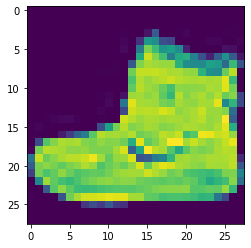

In [ ]:
# plot image samples from the dataset 

plt.imshow(x_train[0])

In [ ]:
from numpy.core.fromnumeric import reshape
# check the shape of the following (x_train, y_train and x_test, y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


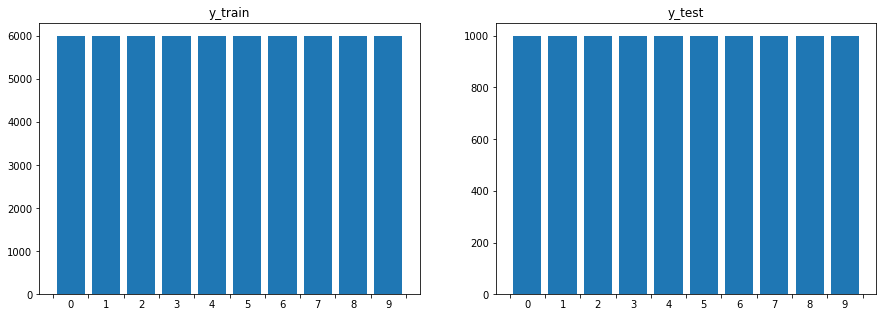

In [ ]:



mybins = range(11)
fig = plt.figure(figsize=(15,5))
ax = fig.subplots(nrows=1, ncols=2) 
ax[0].set_title('y_train')

ax[0].hist(y_train, bins=mybins, rwidth=0.8)
ax[0].set_xticks(mybins)
ax[0].xaxis.set_minor_locator(tkr.AutoMinorLocator(n=2))
ax[0].xaxis.set_minor_formatter(tkr.FixedFormatter(mybins))
ax[0].xaxis.set_major_formatter(tkr.NullFormatter())
for tick in ax[0].xaxis.get_minor_ticks():
  tick.tick1line.set_markersize(0)
ax[1].set_title('y_test')
ax[1].hist(y_test, bins=mybins, rwidth=0.8)
ax[1].set_xticks(mybins)
ax[1].xaxis.set_minor_locator(tkr.AutoMinorLocator(n=2))
ax[1].xaxis.set_minor_formatter(tkr.FixedFormatter(mybins))
ax[1].xaxis.set_major_formatter(tkr.NullFormatter())
for tick in ax[1].xaxis.get_minor_ticks():
  tick.tick1line.set_markersize(0)
        



plt.show()



# 3- Make sure the pixels values are scaled between (0-1)

In [ ]:
# scale the pixels values between 0-1
x_train=x_train/255.0
x_test=x_test/255.0


In [ ]:
# convert the images into vectors
x_train_v=np.reshape(x_train,(len(x_train),28*28))
print(f'x-train {x_train_v.shape}')
x_test_v=np.reshape(x_test,(len(x_test),28*28))
print(f'x-test {x_test_v.shape}')

x-train (60000, 784)
x-test (10000, 784)


# 4- Make sure to convert the target into one hot vector

In [ ]:
# encode the training and testing target into one hot vector

y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))
print(f'y-train-hot{y_train_hot.shape}')
print(f'y-test-hot{y_test_hot.shape}')
print(f'one hot encoder for first image { y_test_hot[0]}')
print(f'value of first image {y_test[0]}')

y-train-hot(60000, 10)
y-test-hot(10000, 10)
one hot encoder for first image [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
value of first image 9


# 5- Modeling
Train six different models (KNN, Logistics Regression, Support Vector Machine, Decision Tree, Random Forest, DNN)


**Note:**
1. Make sure to saperate each model in a new sub-section.
2. Make sure to achieve the following results for the testing data: 
<br> Accuracy equal or above "95%", and Loss equal or below "0.1".
3. Plot the loss and validation loss values from the training history of the DNN model.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## KNN Model

In [ ]:
# build the model
model_KNN= neighbors.KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(x_train_v,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model evaluation

In [ ]:
# evaluate the model
pred_KNN = model_KNN.predict(x_test_v)
print(f"acc : {metrics.accuracy_score(y_test,pred_KNN)}")
print(f"Precision : {metrics.precision_score(y_test,pred_KNN, average='weighted')}")
print(f"recall_score : {metrics.recall_score(y_test,pred_KNN,average='weighted')}")
print(f"f1 : {metrics.f1_score(y_test,pred_KNN,average='weighted')}")

KeyboardInterrupt: ignored

## Logistics Regression Model

In [ ]:
# build the model
model_LR = linear_model.LogisticRegression()
model_LR.fit(x_train_v, y_train)

### Model evaluation

In [ ]:
# evaluate the model
pred_LR = model_LR.predict(x_test_v)
print(f"acc : {metrics.accuracy_score(y_test,pred_LR)}")
print(f"Precision : {metrics.precision_score(y_test,pred_LR,average='weighted')}")
print(f"recall_score : {metrics.recall_score(y_test,pred_LR,average='weighted')}")
print(f"f1 : {metrics.f1_score(y_test,pred_LR,average='weighted')}")

## Support Vector Machine Model

In [ ]:
# build the model
model_svm = svm.SVC(C=1, kernel='rbf',gamma="scale")
model_svm.fit(x_train_v,y_train)

### Model evaluation

In [ ]:
# evaluate the model
pred_svm = model_svm.predict(x_test_v)
print(f"acc : {metrics.accuracy_score(y_test,pred_svm)}")
print(f'Precision : {metrics.precision_score(y_test,pred_svm,average="weighted")}')
print(f'recall_score : {metrics.recall_score(y_test,pred_svm,average="weighted")}')
print(f"f1 : {metrics.f1_score(y_test,pred_svm,average='weighted')}")

## Decision Tree Model

In [ ]:
# build the model
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train_v,y_train)

### Model evaluation

In [ ]:
# evaluate the model
pred_tree = model_tree.predict(x_test_v)
print(f"acc : {metrics.accuracy_score(y_test,pred_tree)}")
print(f"Precision : {metrics.precision_score(y_test,pred_tree,average='weighted')}")
print(f"recall_score : {metrics.recall_score(y_test,pred_tree,average='weighted')}")
print(f"f1 : {metrics.f1_score(y_test,pred_tree,average='weighted')}")

## Random Forest Model

In [ ]:
# build the model
model_random_forest = ensemble.RandomForestClassifier(n_estimators=10, max_depth=15, random_state=42, n_jobs=-1, oob_score=True)
model_random_forest.fit(x_train_v, y_train)

### Model evaluation

In [ ]:
# evaluate the model
pred_rf=model_random_forest.predict(x_test_v)
print(f"acc : {metrics.accuracy_score(y_test,pred_rf)}")
print(f"Precision : {metrics.precision_score(y_test,pred_rf,average='weighted')}")
print(f"recall_score : {metrics.recall_score(y_test,pred_rf,average='weighted')}")
print(f"f1 : {metrics.f1_score(y_test,pred_rf,average='weighted')}")

## DNN Model

In [ ]:
tf.keras.backend.clear_session()
class WidNetBlock(tf.keras.layers.Layer):
    def __init__(self,units_list=[],dropout_rate_list=[],**kwargs):
        super(WidNetBlock,self).__init__(**kwargs)

        self.dense_1 = tf.keras.layers.Dense(units=units_list[0],activation=tf.nn.relu)
        self.dropout_1 = tf.keras.layers.Dropout(rate= dropout_rate_list[0])
        self.dense_2 = tf.keras.layers.Dense(units=units_list[1],activation=tf.nn.relu)
        self.dropout_2 = tf.keras.layers.Dropout(rate= dropout_rate_list[1])

    def call(self, inputs):
        d_1 = self.dense_1(inputs)
        d_1_dropout = self.dropout_1(d_1)
        d_2 = self.dense_2(d_1_dropout)
        d_2_dropout = self.dropout_2(d_2)

        return d_2_dropout

class DeepWideNet(tf.keras.Model):
    def __init__(self):
        super(DeepWideNet,self).__init__()
        
        self.block_1 = WidNetBlock(units_list=[512,256],dropout_rate_list=[0.5,0.4],name='block_1')
        self.block_2 = WidNetBlock(units_list=[512,256],dropout_rate_list=[0.4,0.3],name='block_2')
        # self.block_3 = WidNetBlock(units_list=[256,512],dropout_rate_list=[0.35,0.25],name='block_3')

        self.out = tf.keras.layers.Dense(10,name= 'out')
    def call(self,x):
        x=self.block_1(x)
        x=self.block_2(x)
        # x=self.block_3(x)
        x=self.out(x)
        x=tf.nn.softmax(x)
        return x

    def build_model(self):
        x = tf.keras.layers.Input((784))
        return tf.keras.Model(inputs = [x], outputs = [self.call(x)])


model_dnn = DeepWideNet()
model_dnn.build_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 block_1 (WidNetBlock)       (None, 256)               533248    
                                                                 
 block_2 (WidNetBlock)       (None, 256)               262912    
                                                                 
 out (Dense)                 (None, 10)                2570      
                                                                 
 tf.nn.softmax (TFOpLambda)  (None, 10)                0         
                                                                 
Total params: 798,730
Trainable params: 798,730
Non-trainable params: 0
_________________________________________________________________


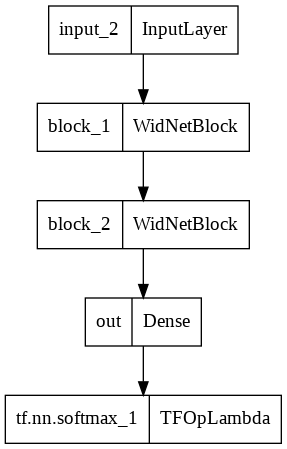

In [ ]:
tf.keras.utils.plot_model(model_dnn.build_model())

In [ ]:
model_dnn.compile(optimizer= tf.optimizers.Adam(),loss = tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
model_dnn.fit(x=x_train_v,y=y_train_hot,epochs= 20, batch_size=32,validation_data=(x_test_v,y_test_hot))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7062 - acc: 0.7416 - val_loss: 0.4764 - val_acc: 0.8362
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5376 - acc: 0.8087 - val_loss: 0.4832 - val_acc: 0.8340
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4964 - acc: 0.8263 - val_loss: 0.4272 - val_acc: 0.8491
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4819 - acc: 0.8317 - val_loss: 0.4206 - val_acc: 0.8531
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4638 - acc: 0.8383 - val_loss: 0.4107 - val_acc: 0.8526
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4548 - acc: 0.8426 - val_loss: 0.4081 - val_acc: 0.8599
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4447 - acc: 0.8444 - val_loss: 0.4040 - val_acc: 0.8504
Epoch 8/20
1875/1875 [==============================] -

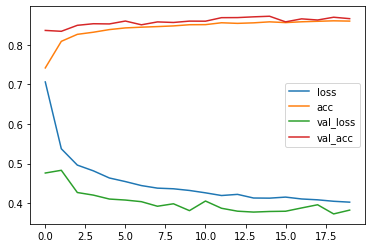

In [ ]:
pd.DataFrame(model_dnn.history.history).plot()

### Model evaluation

In [ ]:
# evaluate the model
pred_dnn=model_dnn.predict(x_test_v)
pred_dnn = np.argmax(pred_dnn, axis = -1)
print(f"acc : {metrics.accuracy_score(y_test,pred_dnn)}")
print(f"Precision : {metrics.precision_score(y_test,pred_dnn,average='weighted')}")
print(f"recall_score : {metrics.recall_score(y_test,pred_dnn,average='weighted')}")
print(f"f1 : {metrics.f1_score(y_test,pred_dnn,average='weighted')}")

#Result


The best model is [SVM](https://colab.research.google.com/drive/1vrQFzMW1h8JZXycJarVQDtW_TkQYyWba?authuser=2#scrollTo=uK9Yh08I36DI&line=5&uniqifier=1)